Difference at (0, 0): 344758
Difference at (1, 0): 354178
Difference at (2, 0): 346026
Difference at (3, 0): 349817
Difference at (4, 0): 350703
Difference at (5, 0): 350692
Difference at (6, 0): 350337
Difference at (7, 0): 353157
Difference at (8, 0): 362376
Difference at (9, 0): 359551
Difference at (10, 0): 358315
Difference at (11, 0): 354074
Difference at (12, 0): 363036
Difference at (13, 0): 356282
Difference at (14, 0): 359858
Difference at (15, 0): 367477
Difference at (16, 0): 366519
Difference at (17, 0): 369630
Difference at (18, 0): 361318
Difference at (19, 0): 364923
Difference at (20, 0): 366209
Difference at (21, 0): 371461
Difference at (22, 0): 367575
Difference at (23, 0): 361556
Difference at (24, 0): 367528
Difference at (25, 0): 370810
Difference at (26, 0): 368688
Difference at (27, 0): 372022
Difference at (28, 0): 372245
Difference at (29, 0): 370532
Difference at (30, 0): 374807
Difference at (31, 0): 371003
Difference at (32, 0): 378773
Difference at (33, 0

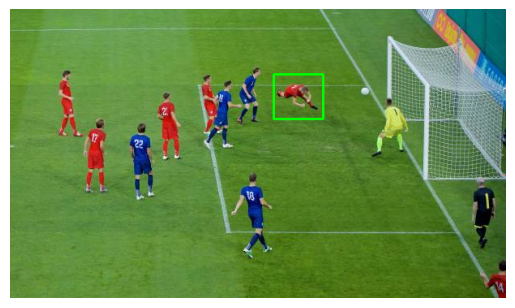

In [5]:
import numpy as np # manipulación de matrices
import cv2 # procesamiento de imágenes
import matplotlib.pyplot as plt # visualización de imágenes
import time # calcular el tiempo de ejecución

# Esta función toma dos argumentos de entrada: image (la imagen en la que se buscará la plantilla) y template (la plantilla que se buscará dentro de la imagen)
def template_matching(image, template):
    start_time = time.time() # Registrar el tiempo de inicio de la ejecución

    # FORMA 1:
    # Convertir la imagen y la plantilla a escala de grises. Esto es porque la coincidencia de plantillas generalmente se realiza en imágenes en escala de grises para simplificar los cálculos
    # gray_image = np.mean(image, axis=2)
    # gray_template = np.mean(template, axis=2)

    # FORMA 2:
    # Convertir la imagen y la plantilla a escala de grises. Esto es porque la coincidencia de plantillas generalmente se realiza en imágenes en escala de grises para simplificar los cálculos
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Obtener las dimensiones de la imagen y la plantilla ya que nos permite iterar sobre todas las posiciones posibles de la plantilla dentro de la imagen
    h, w = gray_image.shape # height y width de la imagen
    ht, wt = gray_template.shape # height y width del template

    # Inicializar la variable para almacenar el mejor match (como infinito) y sus coordenadas "(0, 0)" y tiene como propósito establecer valores iniciales para el algoritmo de búsqueda de coincidencias (template matching)
    best_match = float('inf') # inicializamos best_match con un valor infinito para asegurarnos de que cualquier valor de diferencia entre la región de la imagen y la plantilla encontrada durante la búsqueda sea menor que este valor. De esta manera, en las primeras iteraciones del bucle de búsqueda, cualquier valor de diferencia encontrado se considerará mejor que el valor actual de best_match, lo que garantiza que se actualizará correctamente durante el proceso de búsqueda.
    best_match_coords = (0, 0) # inicializamos best_match_coords con coordenadas (0, 0) como punto de partida para la mejor coincidencia encontrada hasta el momento. Durante la búsqueda, estas coordenadas se actualizarán cada vez que se encuentre una mejor coincidencia

    # Iterar sobre la imagen (en el eje "y" y el eje "x") para encontrar el mejor match
    for y in range(h - ht): # Este bucle itera a lo largo del eje vertical de la imagen (y) menos la altura de la plantilla (ht). Esto asegura que no nos movamos fuera de los límites de la imagen al colocar la plantilla.
        for x in range(w - wt): # Dentro del bucle anterior, otro bucle itera a lo largo del eje horizontal de la imagen (x) menos la anchura de la plantilla (wt). Al igual que con el eje vertical, esto asegura que no nos movamos fuera de los límites de la imagen al colocar la plantilla.
            # Extraer la región de la imagen que coincide con la plantilla actual
            region = gray_image[y:y+ht, x:x+wt]

            # Calcular la diferencia cuadrática entre la región y la plantilla. Al calcular esta diferencia para cada posible posición de la plantilla en la imagen podemos encontrar la posición donde la plantilla se ajusta mejor a la imagen ya que tendrá la menor diferencia cuadrática. Esta es la idea central detrás del algoritmo de coincidencia de plantillas basado en la diferencia de cuadrados.
            # region: Es la parte de la imagen donde estamos buscando la plantilla en ese momento. En cada iteración del bucle, movemos esta región a través de la imagen.
            # gray_template: Es la plantilla que estamos buscando dentro de la imagen. Ambas, la región de la imagen y la plantilla, deben tener las mismas dimensiones para calcular la diferencia.
            # region - gray_template: Esto calcula la diferencia píxel a píxel entre la región de la imagen y la plantilla. Restamos cada píxel de la región de la imagen con el píxel correspondiente en la plantilla. Esto nos da una matriz de diferencias.
            diff = np.sum((region - gray_template)**2)

            # ejemplo del diff
            #  matriz A: A = [[10, 20], [30, 40]]
            #  matriz B: B = [[15, 25], [35, 45]]
            # La diferencia absoluta entre A y B sería: |10-15| + |20-25| + |30-35| + |40-45| = 5 + 5 + 5 + 5 = 20
            # Por lo tanto, la diferencia total entre A y B sería 20.

            # Imprimir la diferencia en cada iteración
            print(f"Difference at ({x}, {y}): {diff}")

            # Actualizar el mejor match si se encuentra uno mejor. Si la diferencia actual es menor que la mejor diferencia anterior, significa que hemos encontrado una mejor coincidencia
            if diff < best_match:
                best_match = diff # Si encontramos una mejor coincidencia, actualizamos best_match con el nuevo valor de diferencia (diff), que representa la mejor coincidencia encontrada hasta el momento
                best_match_coords = (x, y) # Si encontramos una mejor coincidencia, actualizamos best_match_coords con las coordenadas (x, y) de la esquina superior izquierda de la región donde encontramos esta mejor coincidencia.

    # Calcular el tiempo de ejecución
    end_time = time.time()  # Registrar el tiempo de finalización de la ejecución
    execution_time = end_time - start_time  # Calcular el tiempo de ejecución
    print("*"*80)
    print(f"Execution Time: {execution_time:.5f} seconds")  # Imprimir el tiempo de ejecución

    # Esto se hace para no modificar la imagen original ya que queremos dibujar el rectángulo en la copia de la imagen para preservar la imagen original sin cambios
    image_with_match = image.copy()

    # Imprimir las coordenadas con la menor diferencia (el mejor match)
    x, y = best_match_coords
    print(f"Best Match Coords: {best_match_coords}")
    print(f"Best Match: {best_match}")

    # se dibuja un rectángulo en la imagen copiada (image_with_match) alrededor del área donde se encuentra la mejor coincidencia de la plantilla. Los parámetros (x, y) y (x + wt, y + ht) especifican las coordenadas de las esquinas superior izquierda e inferior derecha del rectángulo, respectivamente. El color del rectángulo se establece en (0, 255, 0), lo que representa verde en el espacio de color BGR (azul, verde, rojo). El grosor del rectángulo se establece en 2.
    cv2.rectangle(image_with_match, (x, y), (x + wt, y + ht), (0, 255, 0), 2)

    return image_with_match

# Cargar la imagen y la plantilla
# NOTA: funciona con las siguientes imágenes:
# 1_original_image_template_matching.jpg - (683 x 507) ✅ (Execution Time: 10.30131 seconds // Best Match Coords: (84, 57) // Best Match: 73137)
# 2_original_image_template_matching.jpg - (1024 x 760) ✅ (Execution Time: 52.03934 seconds // Best Match Coords: (143, 81) // Best Match: 142141)
# 3_original_image_template_matching.jpg - (1200 x 1200) ✅ (Execution Time: 114.75589 seconds // Best Match Coords: (557, 552) // Best Match: 54103)
# 4_original_image_template_matching.jpg - (2048 x 1520) ❌ (la terminal finaliza el proceso aprox en el minuto 32)
# 5_original_image_template_matching.jpg - (612 x 356) ✅ (Execution Time: 2.28630 seconds // Best Match Coords: (561, 199) // Best Match: 14685)
# 5_original_image_template_matching.jpg - (612 x 356) ✅ (Execution Time: 2.45430 seconds // Best Match Coords: (325, 80) // Best Match: 7680)
image = cv2.imread('./5_original_image_template_matching.jpg')
template = cv2.imread('./5.1_template_image_template_matching.jpg')

# Aplicar el template matching
result_image = template_matching(image, template)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
